In [34]:
import openturns as ot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shapley.kriging import KrigingIndices, janon_estimator, compute_indice, compute_indices
from shapley.tests.test_functions import ishigami, ot_ishigami, ishigami_true_indices
from shapley.plots import set_style_paper, violin_plot_indices

%load_ext autoreload
%autoreload 2

%matplotlib inline

set_style_paper()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
dim = 3
model = ishigami
ot_model = ot.PythonFunction(dim, 1, ot_ishigami)
margins = [ot.Uniform(-np.pi, np.pi)]*dim
copula = ot.IndependentCopula(dim)
input_distribution = ot.ComposedDistribution(margins, copula)

## Sobol indices with MC

In [3]:
max_budget = 200
n_sample = int(max_budget/(2*dim))
n_boot = 1000

ot.RandomGenerator.SetSeed(0)
input_sample_1 = np.asarray(input_distribution.getSample(n_sample))
input_sample_2 = np.asarray(input_distribution.getSample(n_sample))

In [30]:
first_indices = compute_indices(model, input_sample_1, input_sample_2, n_boot=n_boot)

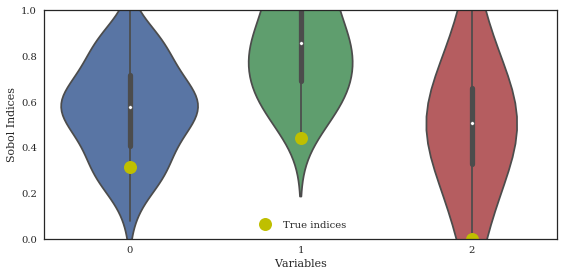

In [32]:
violin_plot_indices(first_indices.T, true_indices=ishigami_true_indices, xlim=[0, 1])

## Sobol indices with kriging
We keep the same budget as previously

In [13]:
n_sample_kriging = max_budget
kriging = KrigingIndices(ot_model, input_distribution)
kriging.build_model(n_sample_kriging=n_sample_kriging)

In [33]:
%%time
n_realization = 100
n_boot = 1000
n_sample_mc = 1000
first_indices = kriging.compute_indices(n_sample=n_sample_mc, n_realization=n_realization, n_boot=n_boot)

Wall time: 52.6 s


### Without the MC error

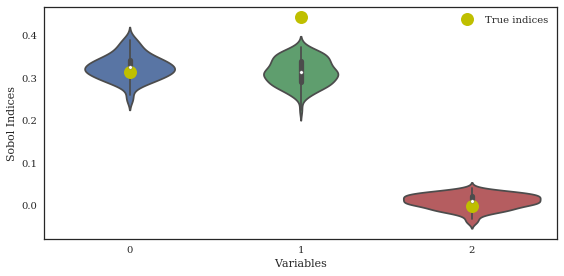

In [40]:
violin_plot_indices(first_indices[:, :, 0].T, true_indices=ishigami_true_indices)

### With the MC error

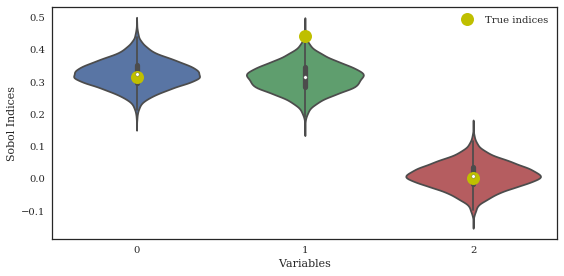

In [41]:
violin_plot_indices(first_indices[:, :].reshape(dim, -1).T, true_indices=ishigami_true_indices)